In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
from functools import reduce

In [55]:
# points:
#  n = 3, ..., 10
#  i = 0, ..., n
default_Xi = lambda i, n: 2*i/n - 1
chebyshev_Xi = lambda i, n, interval=(-1, 1): (interval[0] + interval[1]) / 2 + (interval[1] - interval[0]) / 2 * math.cos((2*i + 1) / (2*n + 2) * math.pi)
f_Xi = lambda Xi: 1 / (1 + 25* Xi**2)

In [96]:
class Interpolation:
    def __init__(self, _Xi) -> None:
        self.Xi = _Xi

    def _basis_polinom(self, n, i, x, f_root_list):
        polinom = [
            (x - f_root_list[j][1]) / (f_root_list[i][1] - f_root_list[j][1])
            for j in range(0, n + 1)
            if j != i
        ]
        return reduce(lambda x, y: x * y, polinom)

    def P(self, n, x):
        f_root_list = []
        for i in range(0, n + 1):
            f_root_list.append((f_Xi(Xi=self.Xi(i, n)), self.Xi(i, n)))

        return sum(
            [
                f_root_list[i][0] * self._basis_polinom(n, i, x, f_root_list)
                for i in range(0, n + 1)
            ]
        )

    def count_error(self, n, x):
        return abs(self.P(n, x) - f_Xi(x))

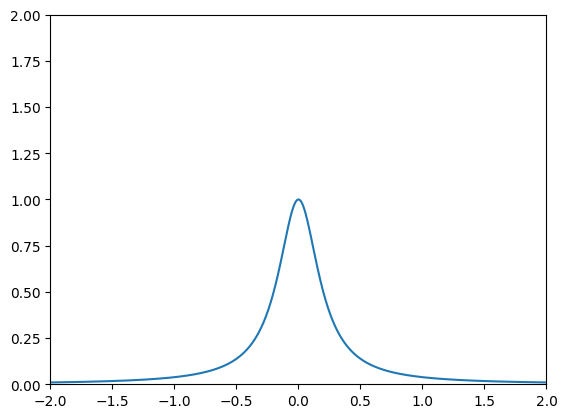

In [102]:
x = np.linspace(-2, 2, 10000)
y = [f_Xi(i) for i in x]

plt.axis([-2, 2, 0, 2])
plt.plot(x, y)

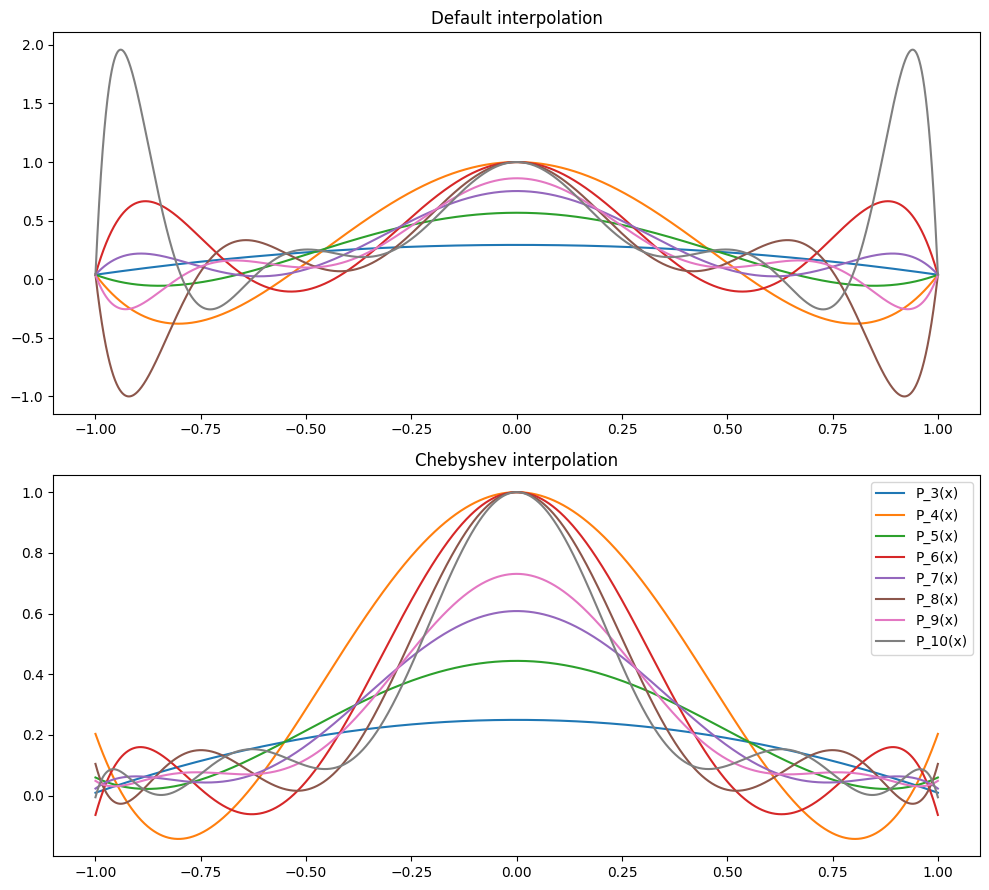

In [103]:
defaul_interpolation = Interpolation(default_Xi)
chebyshev_interpolation = Interpolation(chebyshev_Xi)
x = np.linspace(-1, 1, 10000)
fig, axs = plt.subplots(2, 1, figsize=(10, 9), tight_layout=True)

for n in range(3, 11):
    y_def = [defaul_interpolation.P(n, i) for i in x]
    y_cheb = [chebyshev_interpolation.P(n, i) for i in x]
    
    axs[0].plot(x, y_def, label="P_"+str(n)+"(x)")
    axs[0].title.set_text("Default interpolation")
    
    axs[1].plot(x, y_cheb, label="P_"+str(n)+"(x)")
    axs[1].title.set_text("Chebyshev interpolation")
    plt.legend()


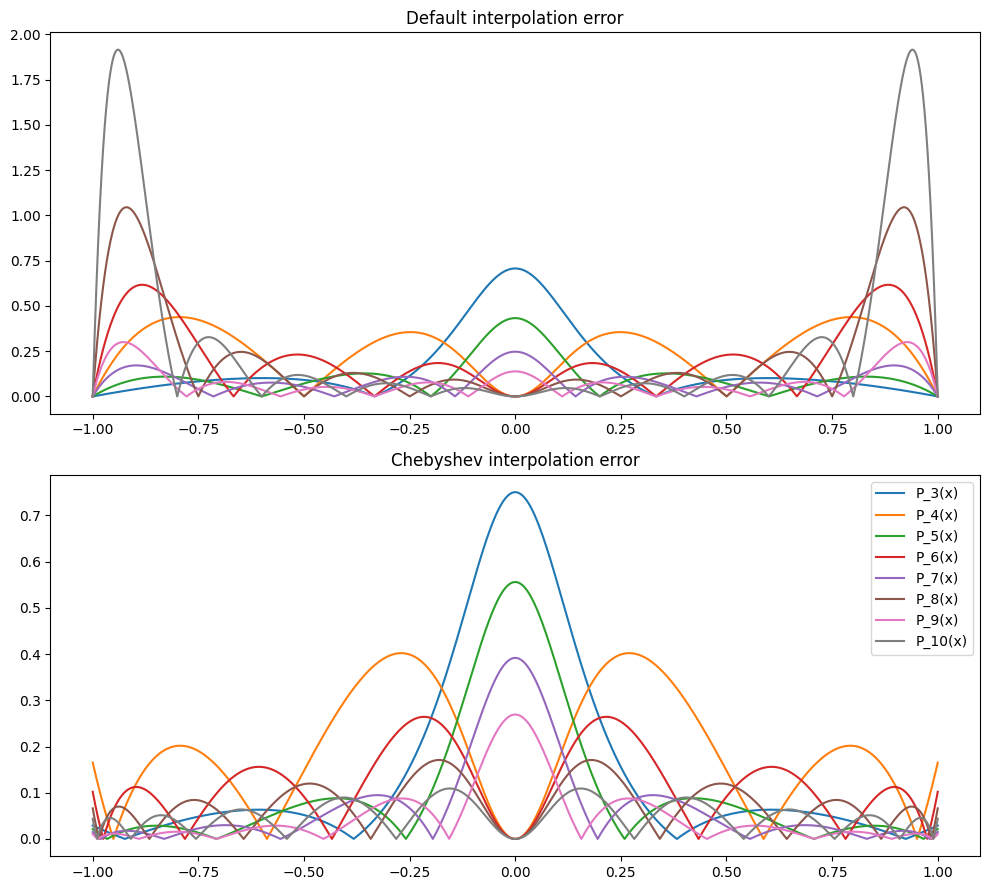

In [93]:
fig, axs = plt.subplots(2, 1, figsize=(10, 9), tight_layout=True)

for n in range(3, 11):
    y_def = [defaul_interpolation.count_error(n, i) for i in x]
    y_cheb = [chebyshev_interpolation.count_error(n, i) for i in x]
    
    axs[0].plot(x, y_def, label="P_"+str(n)+"(x)")
    axs[0].title.set_text("Default interpolation error")
    
    axs[1].plot(x, y_cheb, label="P_"+str(n)+"(x)")
    axs[1].title.set_text("Chebyshev interpolation error")
    plt.legend()